# Marital Status Classification (Married vs. Unmarried) Food

# Import Libraries and Load Data

In [1]:
# import packages
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(16)

In [2]:
# load data
csv_file = "~/IDC5210_Machine_Learning/Project/Translated_data/demos_w_state_trans.csv"
demo_df = pd.read_csv(csv_file)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               103202 non-null  int64  
 1   Cust_ID                  103202 non-null  int64  
 2   Cust_Segment             103202 non-null  object 
 3   Branch_ID                103202 non-null  int64  
 4   Gender                   103202 non-null  object 
 5   Marital_Status           103202 non-null  object 
 6   Education_Lv             103202 non-null  object 
 7   Job_Status               103202 non-null  object 
 8   Income                   100752 non-null  float64
 9   Age                      103202 non-null  int64  
 10  Years_w_Bank             103197 non-null  float64
 11  Work_Region              103202 non-null  object 
 12  Home_Region              103198 non-null  object 
 13  Branch_Region            103198 non-null  object 
 14  1)RI

In [3]:
# drop unnecessary columns
demo_df.drop(["Unnamed: 0"], axis = 1, inplace=True)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Cust_ID                  103202 non-null  int64  
 1   Cust_Segment             103202 non-null  object 
 2   Branch_ID                103202 non-null  int64  
 3   Gender                   103202 non-null  object 
 4   Marital_Status           103202 non-null  object 
 5   Education_Lv             103202 non-null  object 
 6   Job_Status               103202 non-null  object 
 7   Income                   100752 non-null  float64
 8   Age                      103202 non-null  int64  
 9   Years_w_Bank             103197 non-null  float64
 10  Work_Region              103202 non-null  object 
 11  Home_Region              103198 non-null  object 
 12  Branch_Region            103198 non-null  object 
 13  1)RISKSIZ                103202 non-null  float64
 14  2)GE

In [4]:
# count risk types per row
# risk_counts = demo_df.iloc[:,10:22].apply(pd.Series.value_counts, axis=1)
# risk_counts = risk_counts.fillna(0)

In [5]:
# risk_counts

In [6]:
# demo_df = demo_df.join(risk_counts)
# demo_df

In [7]:
# demo_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
#                   'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
#                   'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
#                   'Penalty_201506'], axis = 1, inplace=True)

In [8]:
# demo_df

In [9]:
csv_file2 = "~/IDC5210_Machine_Learning/Project/Translated_data/transactions(SU_ORNEKLEM_KK_HAR_BILGI).csv"
transactions = pd.read_csv(csv_file2, dtype={'Category': 'str'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334625 entries, 0 to 9334624
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Cust_ID         int64  
 2   Trans_Data      object 
 3   Trans_Time      object 
 4   Trans_Amt       float64
 5   Category        object 
 6   Merchant_ID     int64  
 7   Online_Trans    int64  
 8   Trans_Type      object 
 9   Trans_Currency  object 
 10  X               float64
 11  Y               float64
dtypes: float64(3), int64(4), object(5)
memory usage: 854.6+ MB


In [10]:
trans_sub = transactions[['Cust_ID', 'Category', 'Trans_Amt', 'Online_Trans']]
trans_sub

,Cust_ID,Category,Trans_Amt,Online_Trans
0,11861396,RESTORAN,10.57,0
1,13667756,RESTORAN,82.00,0
2,11024865,RESTORAN,15.00,0
3,10922788,RESTORAN,86.00,0
4,10335987,RESTORAN,30.00,0
...,...,...,...,...
9334620,15623192,GIDA,23.50,0
9334621,16382137,TEKSTİL,115.00,0
9334622,16808133,HİZMET SEKTÖRLERİ,32.00,0
9334623,27012943,TEKSTİL,250.00,0


In [11]:
trans_sums = trans_sub.groupby(['Cust_ID', 'Category'])['Trans_Amt'].sum().reset_index()
trans_cats = trans_sums.pivot(columns='Category', index='Cust_ID', values='Trans_Amt')
trans_cats = trans_cats.fillna(0)

In [12]:
trans_cats

Category,AKARYAKIT,ALIŞVERİŞ MERKEZLERİ,ARABA KİRALAMA,AYAKKABI,BEYAZ EŞYA,"DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM",DOĞRUDAN PAZARLAMA-MAIL ORDER,DİĞER,EĞLENCE VE SPOR,EĞİTİM,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1560993,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0
1566513,2170.00,20.05,0.0,0.00,250.0,0.0,0.0,268.50,0.0,0.0,...,0.00,0.00,0.0,858.00,0.0,2238.76,0.00,1375.0,1928.13,0.0
1567711,375.32,0.00,0.0,558.40,55.0,0.0,0.0,350.92,0.0,0.0,...,716.87,89.90,0.0,465.39,0.0,77.57,5587.22,912.6,64.93,70.0
1569761,0.00,0.00,0.0,459.87,0.0,0.0,0.0,0.00,0.0,0.0,...,1590.00,59.99,0.0,0.00,0.0,8797.33,1319.34,0.0,3026.21,0.0
1569938,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,379.00,19.90,840.0,74.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196275,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,55.25,0.00,0.0,0.00,0.0
28196280,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,229.90,0.0
28200516,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,5338.26,0.00,0.0,0.00,0.0


In [13]:
demo_df = demo_df.join(trans_cats, on='Cust_ID')

In [14]:
demo_df.drop('Cust_ID', axis = 1, inplace = True)

In [15]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 66 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Cust_Segment                            103202 non-null  object 
 1   Branch_ID                               103202 non-null  int64  
 2   Gender                                  103202 non-null  object 
 3   Marital_Status                          103202 non-null  object 
 4   Education_Lv                            103202 non-null  object 
 5   Job_Status                              103202 non-null  object 
 6   Income                                  100752 non-null  float64
 7   Age                                     103202 non-null  int64  
 8   Years_w_Bank                            103197 non-null  float64
 9   Work_Region                             103202 non-null  object 
 10  Home_Region                             1031

# Data Exploration

In [16]:
demo_df['Cust_Segment'].value_counts()

BİREYSEL                       96149
BİREBİR                         4000
MİKRO                           2830
EXI26                            130
ÖZEL BANKACILIK MÜŞTERİLERİ       93
Name: Cust_Segment, dtype: int64

In [17]:
demo_df['Marital_Status'].value_counts()

EVLİ                65637
BEKAR               30877
BOŞANMIŞ             4831
BİLINMİYOR           1397
DUL                   457
EVLİLİĞİN İPTALİ        3
Name: Marital_Status, dtype: int64

In [18]:
demo_df['Education_Lv'].value_counts()

HS_below      64438
University    34944
Graduate       3737
BİLİNMİYOR       83
Name: Education_Lv, dtype: int64

In [19]:
demo_df['Job_Status'].value_counts()

ÜCRETLİ (ÖZEL)                    78467
SERBEST MESLEK                    11056
ÜCRETLI (KAMU)                     5342
EMEKLİ                             3403
ÇALIŞAN EMEKLİ(ÜCRETLİ)            1997
EV HANIMI                           785
ÇALIŞMIYOR                          705
ÇALIŞAN EMEKLİ(SERBEST MESLEK)      591
DİĞER                               455
TANIMSIZ                            225
ÖĞRENCİ                             165
YURTDIŞINDA ÇALIŞAN                   8
ÇOCUK (18 YAŞIN ALTINDA)              3
Name: Job_Status, dtype: int64

In [20]:
demo_df['Home_Region'].value_counts()

MARMARA             100587
BLACK SEA              671
CENTRAL ANATOLIA       494
MEDITERRANEAN          468
AEGEAN                 377
EASTERN ANATOLIA       333
SE ANATOLIA            268
Name: Home_Region, dtype: int64

In [21]:
demo_df['Work_Region'].value_counts()

MARMARA             101824
CENTRAL ANATOLIA       353
AEGEAN                 316
BLACK SEA              255
MEDITERRANEAN          200
EASTERN ANATOLIA       144
SE ANATOLIA            110
Name: Work_Region, dtype: int64

In [22]:
demo_df['Branch_Region'].value_counts()

MARMARA             98475
BLACK SEA            1118
CENTRAL ANATOLIA     1100
AEGEAN               1089
MEDITERRANEAN         713
EASTERN ANATOLIA      380
SE ANATOLIA           323
Name: Branch_Region, dtype: int64

In [23]:
# check values for nulls
demo_df.isnull().sum(axis = 0)

Cust_Segment                          0
Branch_ID                             0
Gender                                0
Marital_Status                        0
Education_Lv                          0
                                   ... 
TEKNOLOJİ                          1345
TEKSTİL                            1345
TELEKOMÜNİKASYON                   1345
YAPI MALZ., HIRDAVAT, NALBURİYE    1345
İÇKİLİ YERLER - KUMARHANE          1345
Length: 66, dtype: int64

In [24]:
demo_df[demo_df['DİĞER'].isnull()]
#looks like these customers didn't have transaction data or did not use their credit cards

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
138,BİREYSEL,4,E,EVLİ,University,ÜCRETLİ (ÖZEL),1700.0,29,8.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,MİKRO,4,E,BİLINMİYOR,University,SERBEST MESLEK,25000.0,36,13.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,BİREYSEL,4,K,BOŞANMIŞ,HS_below,ÜCRETLİ (ÖZEL),1215.0,31,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,BİREYSEL,7,E,EVLİ,HS_below,ÜCRETLİ (ÖZEL),2300.0,40,14.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,BİREYSEL,13,E,EVLİ,HS_below,ÜCRETLİ (ÖZEL),2000.0,38,7.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102793,BİREYSEL,685,E,BEKAR,University,ÜCRETLI (KAMU),0.0,24,1.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102835,BİREYSEL,822,E,EVLİ,HS_below,ÜCRETLİ (ÖZEL),1500.0,25,6.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103008,BİREYSEL,232,E,BEKAR,University,ÜCRETLİ (ÖZEL),2500.0,25,4.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103063,BİREYSEL,532,E,EVLİ,HS_below,ÜCRETLİ (ÖZEL),1000.0,37,6.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#demo_df.dropna(subset=["AKARYAKIT"], inplace=True)
demo_df.dropna(subset=["Home_Region"], inplace=True)
demo_df.dropna(subset=["Branch_Region"], inplace=True)
demo_df.dropna(subset=["transaction_food_mean"], inplace=True)
demo_df.dropna(subset=["transaction_food_max"], inplace=True)

In [26]:
demo_df.drop(['transaction_health_mean', 'transaction_health_max', 'transaction_gas_mean', 'transaction_gas_max'], axis = 1, inplace=True)

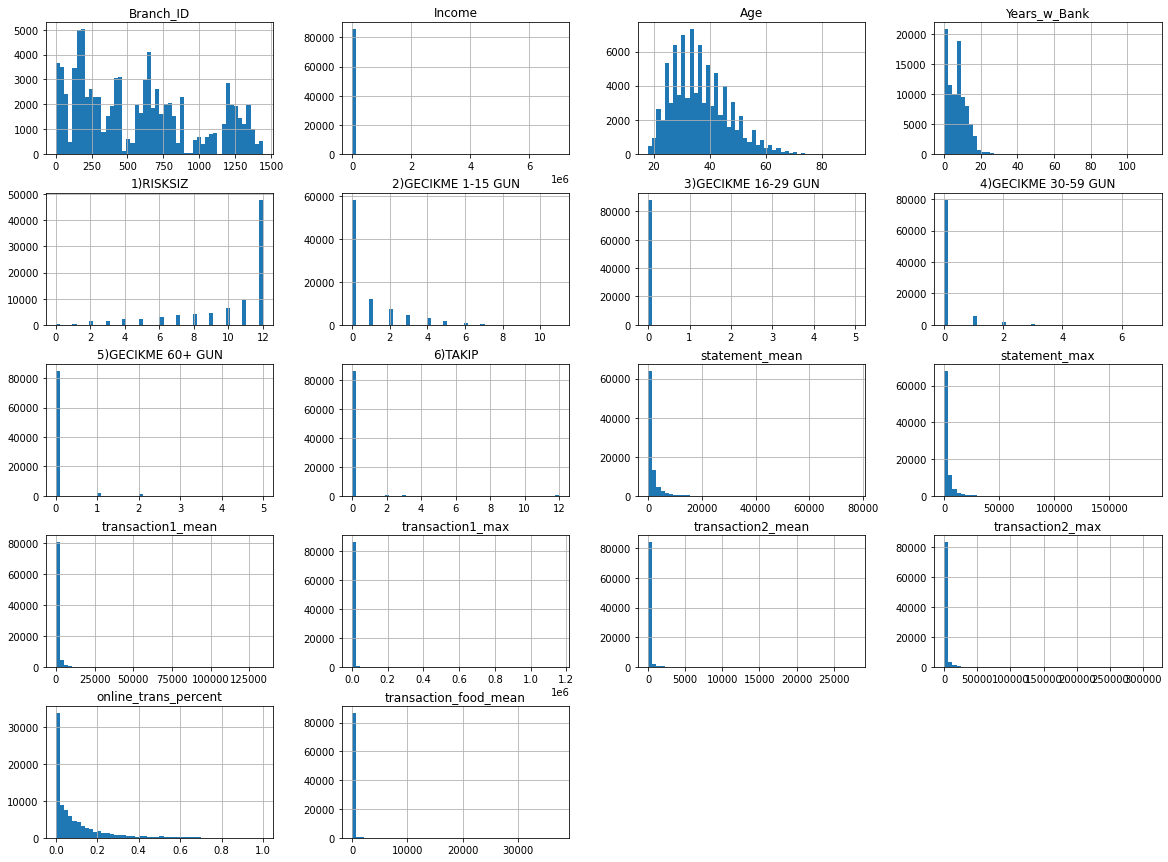

In [27]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
demo_df.iloc[:,0:26].hist(bins=50, figsize=(20,15))
plt.show()

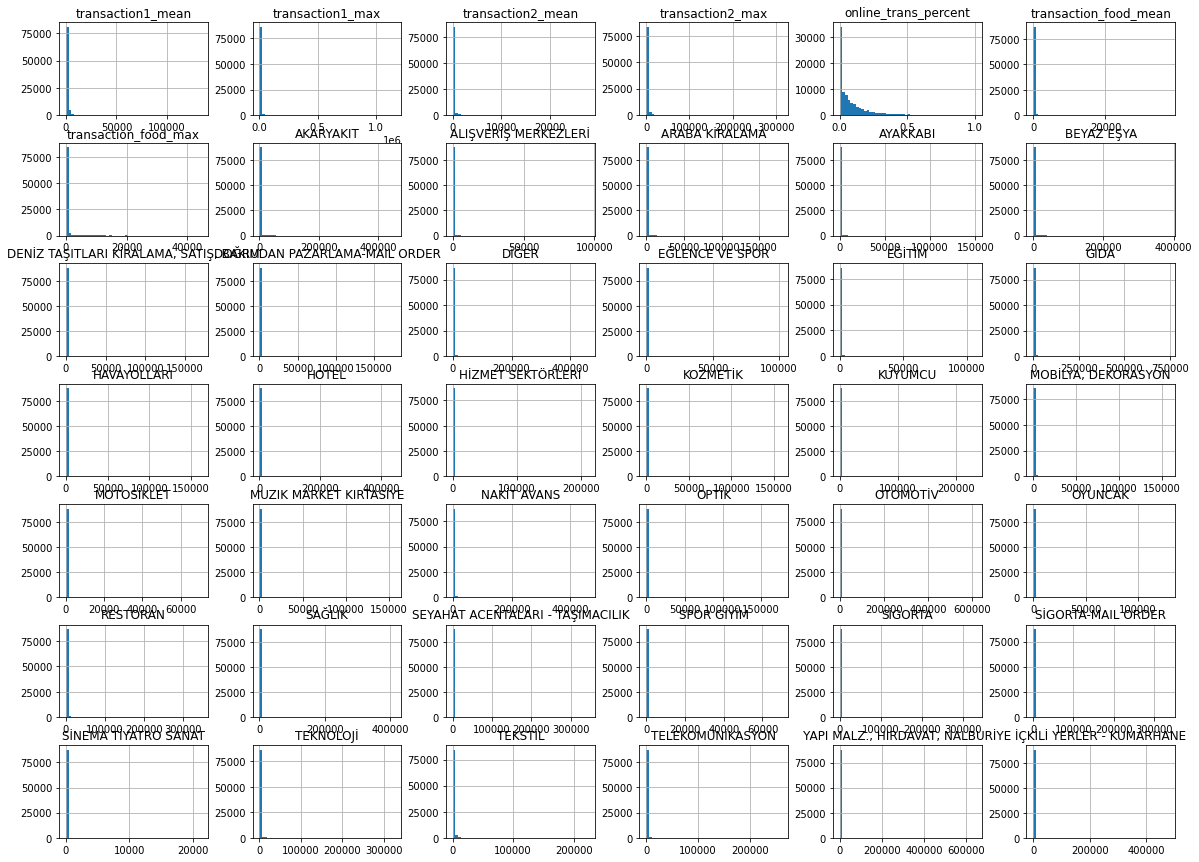

In [28]:
demo_df.iloc[:,20:].hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
demo_df.columns.values

array(['Cust_Segment', 'Branch_ID', 'Gender', 'Marital_Status',
       'Education_Lv', 'Job_Status', 'Income', 'Age', 'Years_w_Bank',
       'Work_Region', 'Home_Region', 'Branch_Region', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent',
       'transaction_food_mean', 'transaction_food_max', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTAL

# Data Processing

In [30]:
#train/test split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(demo_df, test_size = 0.2, random_state = 16)

In [31]:
# separate labels from feature matrix
train_y = train_set['Marital_Status']
train_X = train_set.drop('Marital_Status', axis = 1)
test_y = test_set['Marital_Status']
test_X = test_set.drop('Marital_Status', axis = 1)

In [32]:
#pipeline

# locations, gender, marital status, education level, job status, penalties
# Additional processing with full data set: drop home region branch region nulls

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [34]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent',
       'transaction_food_mean', 'transaction_food_max', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUMARHANE']
cat_attribs = ['Cust_Segment', 'Gender', 'Education_Lv', 'Job_Status', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs), 
], remainder = 'passthrough')

In [35]:
train_X_prepared = full_pipeline.fit_transform(train_X)

In [36]:
train_y_md = (train_y == 'EVLİ')
test_y_md = (test_y == 'EVLİ')

# Dimensionality Reduction

In [37]:
#pca
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 97)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [38]:
d

44

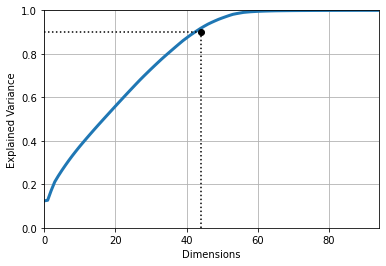

In [39]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 94, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")

plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

# try 8 dimensions

In [40]:
TruncSVD = TruncatedSVD(n_components=44)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

## Train Model

## Bagging Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=9, max_features=6), n_estimators=118,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_reduced, train_y_md)

bag_clf.oob_score_

0.7407517561749377

In [42]:
y_train_pred = bag_clf.predict(X_reduced)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_md, y_train_pred)

0.741559030138228

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[12162, 13284],
       [ 4964, 40198]])

In [45]:
feature_importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.07918177034737703, 'Education_Lv'),
 (0.051308892820156, 'Age'),
 (0.04414488478759999, 'Job_Status'),
 (0.04313115795021583, 'Cust_Segment'),
 (0.032605803196613964, 'Branch_ID'),
 (0.03071331164488465, 'Years_w_Bank'),
 (0.029394420834954724, 'Marital_Status'),
 (0.028603596315918946, '2)GECIKME 1-15 GUN'),
 (0.025502963081387192, 'Income'),
 (0.023352116876598574, 'transaction_food_max')]

## AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=3, max_features=4), n_estimators=265,
algorithm="SAMME.R", learning_rate=0.1)

ada_clf.fit(X_reduced, train_y_md)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         max_features=4),
                   learning_rate=0.1, n_estimators=265)

In [47]:
from sklearn.model_selection import cross_val_predict

y_train_pred = ada_clf.predict(X_reduced)

In [48]:
confusion_matrix(train_y_md, y_train_pred)

array([[14323, 11123],
       [ 5138, 40024]])

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_md, y_train_pred)

0.7697003172445048

In [50]:
feature_importances = np.mean([tree.feature_importances_ for tree in ada_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.10202638559158018, 'Education_Lv'),
 (0.05400098574169881, 'Cust_Segment'),
 (0.04869594937902841, 'Branch_ID'),
 (0.04373089063757695, 'Job_Status'),
 (0.04227453497152306, 'Years_w_Bank'),
 (0.04092058698814059, 'AYAKKABI'),
 (0.035261688771876125, 'Income'),
 (0.03432216018804721, 'Age'),
 (0.03416766007611914, 'Marital_Status'),
 (0.030095852940713163, '5)GECIKME 60+ GUN')]

## Gradient Boost

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbrt = GradientBoostingClassifier(max_depth=3, max_features=3, n_estimators=260, learning_rate=0.1)
gbrt.fit(X_reduced, train_y_md)

GradientBoostingClassifier(max_features=3, n_estimators=260)

In [53]:
from sklearn.model_selection import cross_val_predict

y_train_pred = gbrt.predict(X_reduced)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y_md, y_train_pred)

0.7700118966689327

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[14314, 11132],
       [ 5107, 40055]])

In [56]:
feature_importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.07918177034737703, 'Education_Lv'),
 (0.051308892820156, 'Age'),
 (0.04414488478759999, 'Job_Status'),
 (0.04313115795021583, 'Cust_Segment'),
 (0.032605803196613964, 'Branch_ID'),
 (0.03071331164488465, 'Years_w_Bank'),
 (0.029394420834954724, 'Marital_Status'),
 (0.028603596315918946, '2)GECIKME 1-15 GUN'),
 (0.025502963081387192, 'Income'),
 (0.023352116876598574, 'transaction_food_max')]

## Neural Network

In [57]:
# import tensorflow as tf
# from tensorflow import keras

In [58]:
# X_train, X_val, y_train, y_val = train_test_split(X_reduced, train_y_md)

In [59]:
# input_ = keras.layers.Input(shape=X_reduced.shape[1:])
# hidden1 = keras.layers.Dense(100, activation="relu")(input_)
# hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
# output = keras.layers.Dense(1)(hidden2)
# model = keras.models.Model(inputs=[input_], outputs=[output])
# model.summary()

In [60]:
# model.compile(loss="binary_crossentropy",
# metrics=["accuracy"])


In [61]:
 # history = model.fit(X_train, y_train, epochs=30,
 # validation_data=(X_val, y_val))


# Test data on test sets

## Bagging Test

In [62]:
test_X_prepared = full_pipeline.transform(test_X)
test_X_reduced = TruncSVD.transform(test_X_prepared)

In [63]:
bag_y_pred = bag_clf.predict(test_X_reduced)
accuracy_score(test_y_md, bag_y_pred)

0.7470118393474197

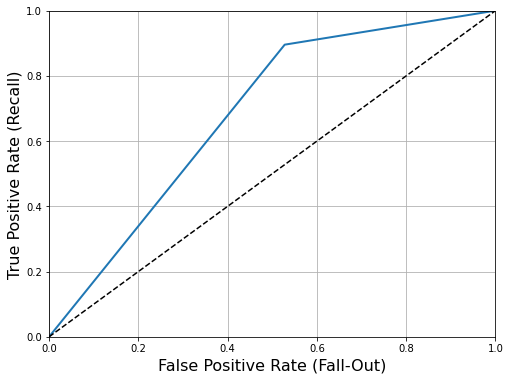

In [64]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y_md, bag_y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

## AdaBoost Test

In [65]:
ada_y_pred = ada_clf.predict(test_X_reduced)
accuracy_score(test_y_md, ada_y_pred)

0.7660454313714383

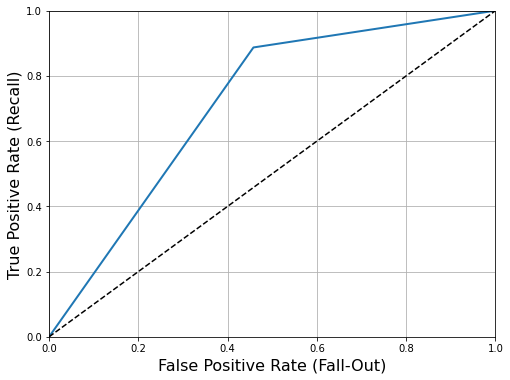

In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y_md, ada_y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

## GradientBoost Test

In [67]:
gbrt_y_pred = gbrt.predict(test_X_reduced)
accuracy_score(test_y_md, gbrt_y_pred)

0.7647425366793179

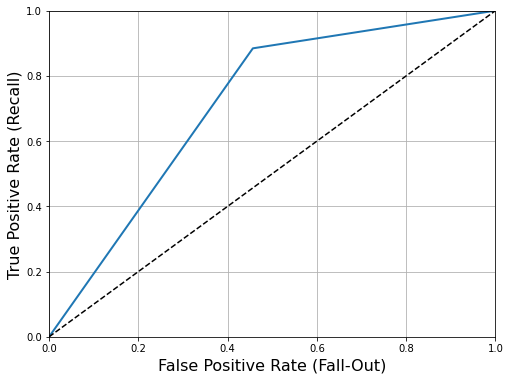

In [68]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y_md, gbrt_y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()